# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Load data

In [2]:
# Load and standardize features by removing the mean and scaling to unit variance
StandardScaler = lambda df: (df-df.mean())/df.std()

XTrain0 = pd.read_csv('./data/Xtr0.csv', sep=' ', header=None)
XTrain1 = pd.read_csv('./data/Xtr1.csv', sep=' ', header=None)
XTrain2 = pd.read_csv('./data/Xtr2.csv', sep=' ', header=None)

XTrain0_mat100 = pd.read_csv('./data/Xtr0_mat100.csv', sep=' ', header=None)
XTrain1_mat100 = pd.read_csv('./data/Xtr1_mat100.csv', sep=' ', header=None)
XTrain2_mat100 = pd.read_csv('./data/Xtr2_mat100.csv', sep=' ', header=None)


XTest0 = pd.read_csv('./data/Xte0.csv', sep=' ', header=None)
XTest1 = pd.read_csv('./data/Xte1.csv', sep=' ', header=None)
XTest2 = pd.read_csv('./data/Xte2.csv', sep=' ', header=None)
                    
YTrain0 = pd.read_csv('./data/Ytr0.csv', usecols = ['Bound'])
YTrain1 = pd.read_csv('./data/Ytr1.csv', usecols = ['Bound'])
YTrain2 = pd.read_csv('./data/Ytr2.csv', usecols = ['Bound'])

XTrain0_mat100 = StandardScaler(XTrain0_mat100)
XTrain1_mat100 = StandardScaler(XTrain1_mat100)
XTrain2_mat100 = StandardScaler(XTrain2_mat100)

# PCA analysis functions

In [3]:
def var_pca(features):
    pca = PCA(n_components=min(features.shape[1],2000))
    news=pca.fit(features)
    print("top 5 variance proportions in %",np.array(pca.explained_variance_ratio_[:5])*100)
    plt.plot(pca.explained_variance_)
    plt.title('Variances of PCA coefficients')
    plt.show()

In [4]:
def pca_visual(features):
    pca = PCA(n_components=2)
    news=pca.fit_transform(features)
    plt.scatter(news[YTrain0['Bound']==1,0],news[YTrain0['Bound']==1,1],color='red',alpha=0.6,lw=0.1,label='classe 1')
    plt.scatter(news[YTrain0['Bound']==0,0],news[YTrain0['Bound']==0,1],color='green',alpha=0.6,lw=0.1,label='classe 0')
    plt.title('PCA in 2D')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.show()

# Generation of features with spectrum kernel

In [5]:
from tqdm import tqdm
from itertools import product

In [6]:
def phi_u_spectrum(x,u):
    
    """
    Inputs:
    x: DNA sequence (with ATGC letters)
    u: subsequence of interest
    
    Output:
    occur: number of occurences of u in x
    """
    occur=0
    
    for i in range(len(x)-k+1):
        subsequence = x[i:i+k]
        if subsequence==u:
            occur+=1
    return occur
            
def phi(x,k):
    """
    ------------------------------------------------------------------------------
    Compute the non-linear projection of DNA sequence on a vector of dimension 4**k
    ------------------------------------------------------------------------------
    Inputs:
    x: DNA sequence (with ATGC letters)
    k: length of subsequences considered
    
    Output:
    feat_vec: embedding of input x
    """
    feat_vec=np.zeros(4**k)
    for idx,substring_tuple in enumerate(product('ACGT', repeat=k)):
        u=''.join(substring_tuple)
        feat_vec[idx]=phi_u_spectrum(x,u)
        
    return feat_vec

In [7]:
k=5
print('dimension of features:{}'.format(4**k))
spectral_features=np.zeros([2000,4**k])


for idx,sequence in tqdm(enumerate(XTrain0[0][1:])): #[1:] pour ne pas prendre la ligne 'Id,seq'
    x = sequence.split(',')[1]
    spectral_features[idx,:]=phi(x,k)

11it [00:00, 102.95it/s]

dimension of features:1024


2000it [00:18, 107.15it/s]


In [8]:
"{}% des coefficients sont nuls: sparse matrix...".format(sum(sum(spectral_features==0))/(4**k*2000)*100)

'91.42719726562501% des coefficients sont nuls: sparse matrix...'

# Comparison of features

## Variances proportions

top 5 variance proportions in % [9.71204165 8.36472966 4.34311958 2.87124875 2.57924841]


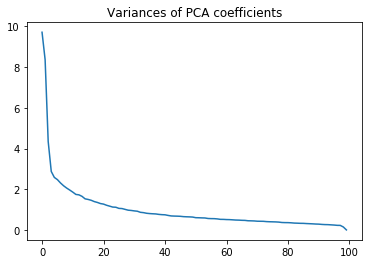

In [9]:
var_pca(np.array(XTrain0_mat100))

top 5 variance proportions in % [2.65528166 2.51625809 1.84476466 1.6973613  1.55651064]


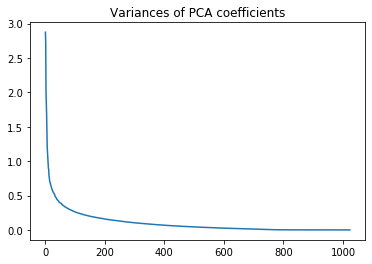

In [10]:
var_pca(spectral_features)

## Visual comparison of 2 first components

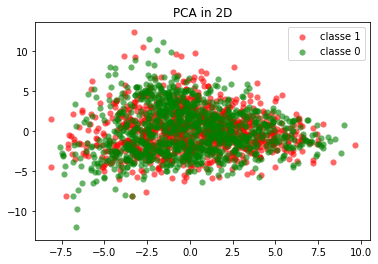

In [11]:
pca_visual(np.array(XTrain0_mat100))

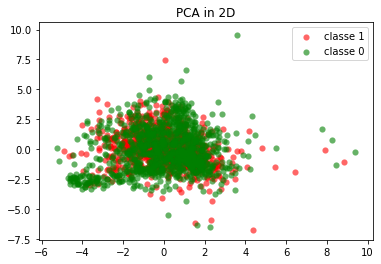

In [12]:
pca_visual(spectral_features)